In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### LAB 1

In [4]:
# task 1
# calc greeks for call option

def calc_derivative(func, x, dx=1e-2):
    return (func(x + dx) - func(x - dx)) / 2 / dx

def calc_second_derivative(func, x, dx=1e-2):
    return (func(x + dx) - 2 * func(x) + func(x - dx)) / dx / dx

def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

#params

S = 100
K = 100
tau = 1
r = 0.07
q = 0
vol = 0.3
print(f'Call = ', call(S, K, tau, vol, r, q))

# delta
dC_dS = calc_derivative(func=lambda x: call(x, K, tau, vol, r, q), x=S)
print('Delta = ', dC_dS)

# gamma
d2C_dS2 = calc_derivative(func=lambda X: calc_derivative(func=lambda x: call(x, K, tau, vol, r, q), x=X), x=S)
print('\nGamma = ', d2C_dS2)

d2C_dS2 = calc_second_derivative(func=lambda x: call(x, K, tau, vol, r, q), x=S)
print('Gamma (other numeric scheme) = ', d2C_dS2, '\n')

# rho
dC_dr = calc_derivative(func=lambda x: call(S, K, tau, vol, x, q), x=r)
print('Rho = ', dC_dr)

# vega
dC_dvol = calc_derivative(func=lambda x: call(S, K, tau, x, r, q), x=vol)
print('Vega = ', dC_dvol)

# theta
dC_dtau = calc_derivative(func=lambda x: call(S, K, x, vol, r, q), x=tau)
print('Theta = ', dC_dtau)

Call =  15.210500635727158
Delta =  0.6492636818265396

Gamma =  0.012356066179108893
Gamma (other numeric scheme) =  0.01235606632121744 

Rho =  49.71200638018374
Vega =  37.066929117762015
Theta =  9.040416541721186


In [27]:
# task 2: calc fair put price and put greeks

def put(S, K, tau, vol, r, q):
    return call(S, K, tau, vol, r, q) + K * np.exp(-r * tau) - S

print(f'Put = ', put(S, K, tau, vol, r, q))

# delta
dP_dS = calc_derivative(func=lambda x: put(x, K, tau, vol, r, q), x=S)
print('Delta = ', dP_dS)

# gamma
d2P_dS2 = calc_derivative(func=lambda X: calc_derivative(func=lambda x: put(x, K, tau, vol, r, q), x=X), x=S)
print('\nGamma = ', d2P_dS2)
d2P_dS2 = calc_second_derivative(func=lambda x: put(x, K, tau, vol, r, q), x=S)
print('Gamma (other numeric scheme) = ', d2P_dS2, '\n')

# rho
dP_dr = calc_derivative(func=lambda x: put(S, K, tau, vol, x, q), x=r)
print('Rho = ', dP_dr)

# vega
dP_dvol = calc_derivative(func=lambda x: put(S, K, tau, x, r, q), x=vol)
print('Vega = ', dP_dvol)

# theta
dP_dtau = calc_derivative(func=lambda x: put(S, K, x, vol, r, q), x=tau)
print('Theta = ', dC_dtau)

Put =  8.44988262632198
Delta =  -0.350736318173972

Gamma =  0.012356066179108893
Gamma (other numeric scheme) =  0.012356066463325988 

Rho =  -43.528929607880684
Vega =  37.066929117762015
Theta =  9.040416541721186


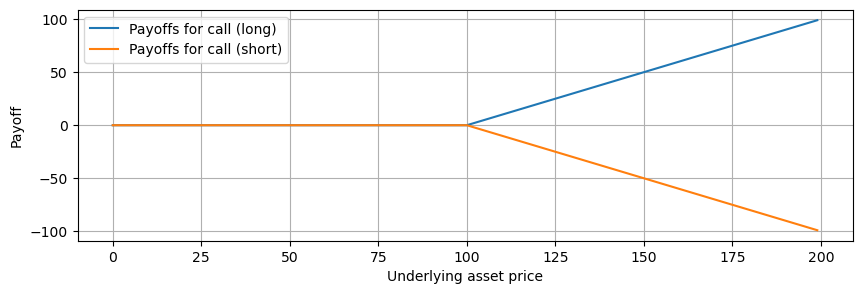

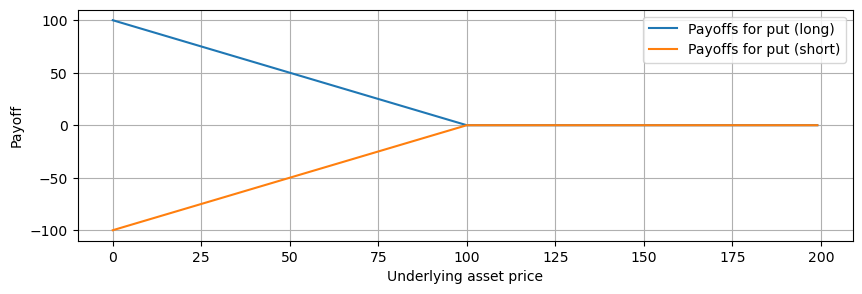

In [24]:
# task 3 plot payoffs for call and put
Ss = np.arange(0, 2 * S)
payoffs = np.maximum(0, Ss - K)

plt.figure(figsize=(10, 3))
plt.plot(Ss, payoffs, label='Payoffs for call (long)')
plt.plot(Ss, -payoffs, label='Payoffs for call (short)')
plt.legend()
plt.xlabel('Underlying asset price')
plt.ylabel('Payoff')
plt.grid()

payoffs = np.maximum(0, -Ss + K)

plt.figure(figsize=(10, 3))
plt.plot(Ss, payoffs, label='Payoffs for put (long)')
plt.plot(Ss, -payoffs, label='Payoffs for put (short)')
plt.xlabel('Underlying asset price')
plt.ylabel('Payoff')
plt.legend()
plt.grid()


### LAB 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

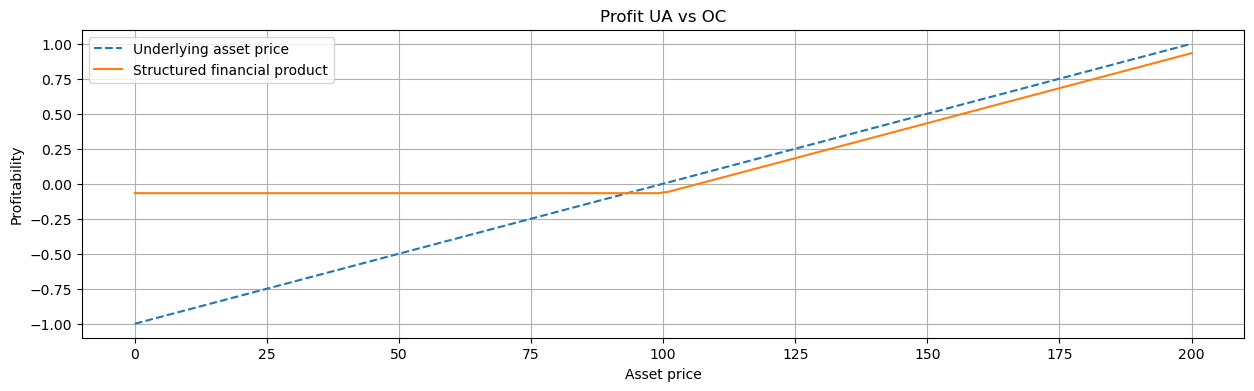

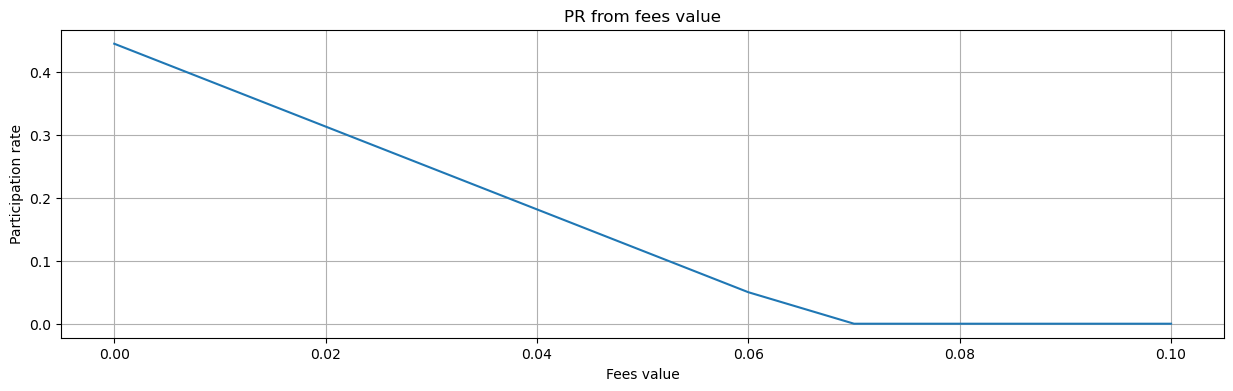

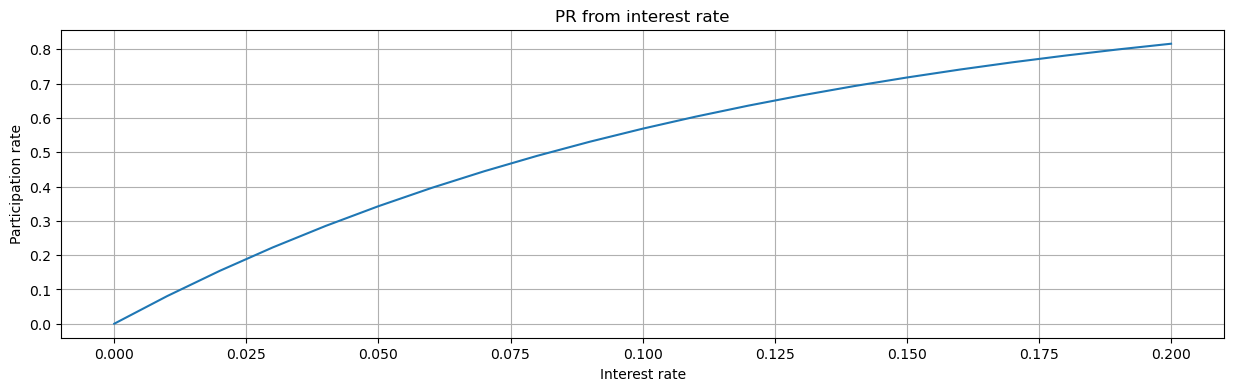

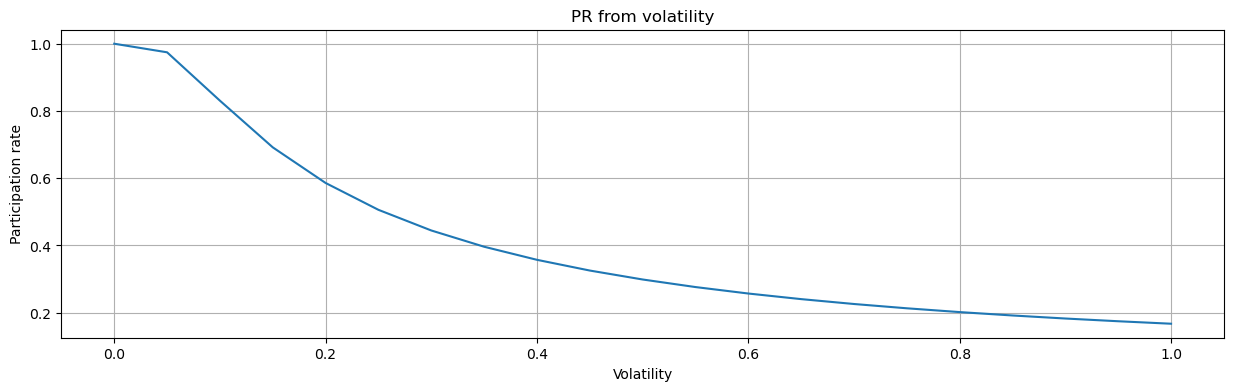

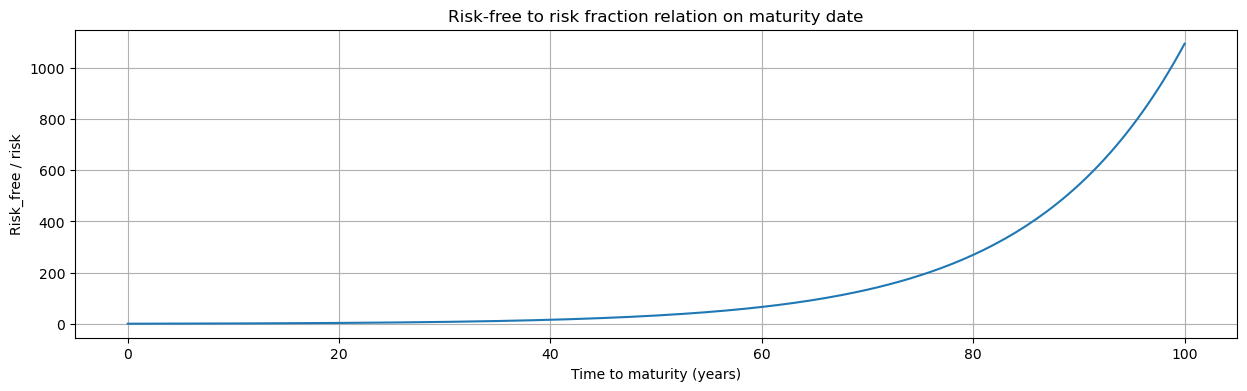

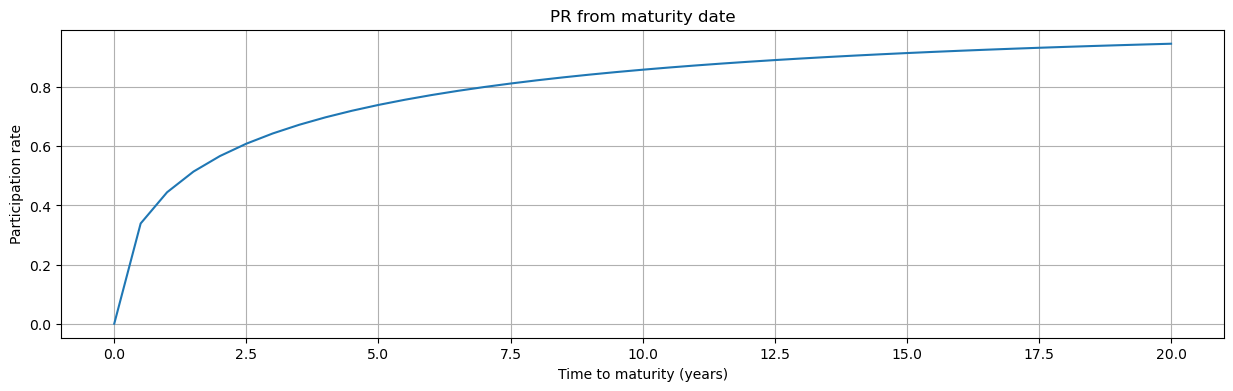

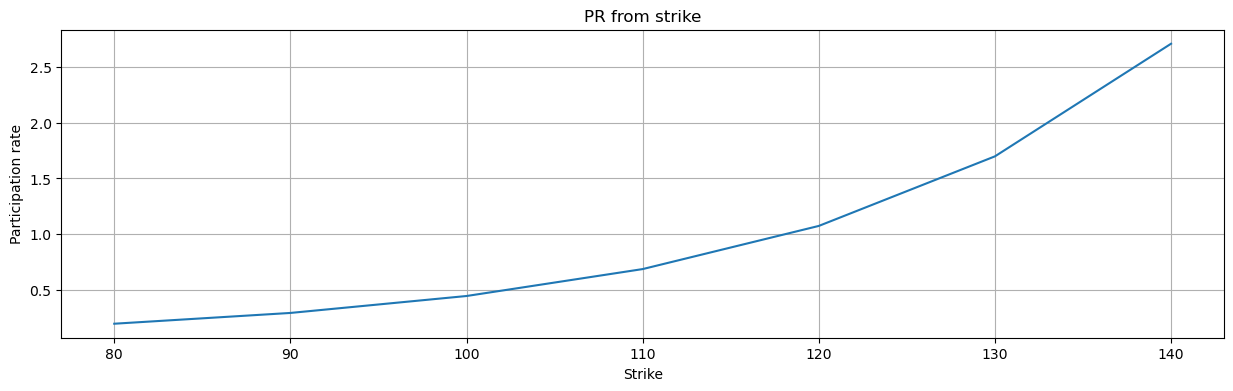

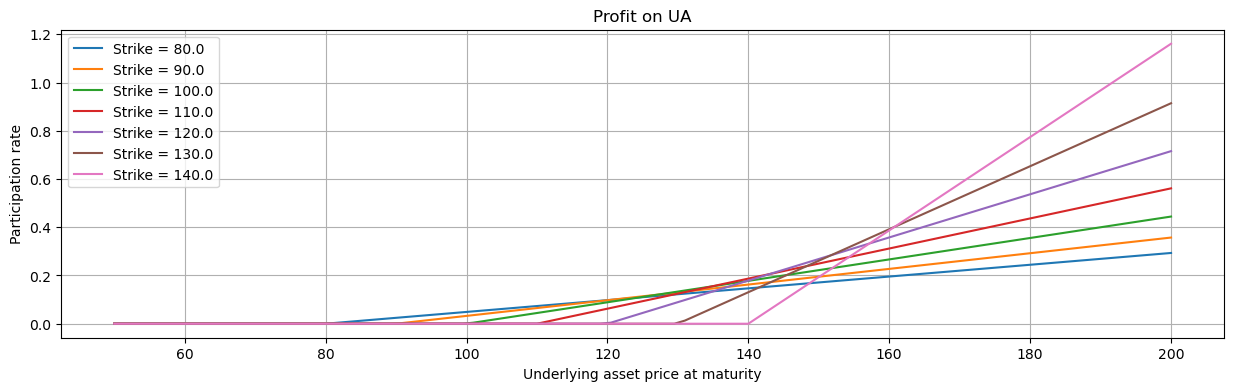

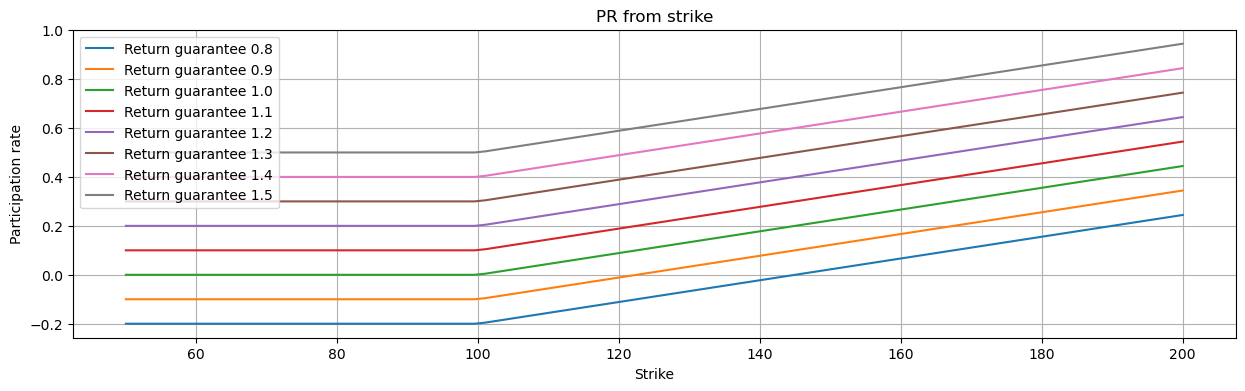

In [60]:
# asset params

S = 100
K = 100
tau = 1
r = 0.07
q = 0
vol = 0.3
N = 100_000
n = 100

# task 1: 
# plot profitability of the product, underlying asset and structured product

risk_part = N - N * np.exp(-r * tau)
c = call(S, K, tau, vol, r, q)
PR = S * round(risk_part / c) / N

underlying_asset_profit = np.linspace(- S, S, n) / S
struct_product_profit = np.maximum(0, underlying_asset_profit) - round(risk_part / c) * c / N

x = np.linspace(0, 2 * S, n)
plt.figure(figsize=(15, 4))
plt.title('Profit UA vs OC')
plt.plot(x, underlying_asset_profit, '--', label='Underlying asset price')
plt.plot(x, struct_product_profit,  label='Structured financial product')
plt.ylabel('Profitability')
plt.xlabel('Asset price')
plt.grid()
plt.legend()

da = np.exp(-r * tau) * N 

# task 3
# participation part from fees
Q = lambda fees: ( N * (1 - fees)  - da ) / c
fees = (np.linspace(0.0, 0.1, 11))
PR = K * Q(fees) / N

plt.figure(figsize=(15, 4))
plt.title('PR from fees value')
plt.plot(fees, np.maximum(PR, 0))
plt.xlabel('Fees value')
plt.ylabel('Participation rate')
plt.grid()

# task 4
# participation part from interest rate
Q = lambda da, c: ( N * (1 - 0.0)  - da ) / c
rs = np.linspace(0, 0.2, 21)
cs = np.fromiter((call(S, K, tau, vol, ri, q) for ri in rs), dtype=np.float32)
das = np.exp(-rs * tau) * N
Qs = np.fromiter((Q(da,c) for da,c in zip(das, cs)), dtype=np.float32)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
plt.title('PR from interest rate')
plt.plot(rs, np.maximum(PR, 0))
plt.xlabel('Interest rate')
plt.ylabel('Participation rate')
plt.grid()

# task 5
# participation part from volatility
vs = np.linspace(1e-5, 1, 21)
cs = call(S, K, tau, vs, r, q)
da = np.exp(-r * tau) * N 
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
Qs = Q(cs)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
plt.title('PR from volatility')
plt.plot(vs, PR)
plt.xlabel('Volatility')
plt.ylabel('Participation rate')
plt.grid()

# task 6
# risk_free2risk from maturity date
taus = np.linspace(1e-5, 100, 201)
risk_parts = N - N * np.exp(-r * taus)
ratios = risk_parts / (N - risk_parts)

plt.figure(figsize=(15, 4))
plt.title('Risk-free to risk fraction relation on maturity date')
plt.plot(taus, ratios)
plt.xlabel('Time to maturity (years)')
plt.ylabel('Risk_free / risk')
plt.grid()

# task 7
# participation part from maturity date
taus = np.linspace(1e-5, 20, 41)
cs = call(S, K, taus, vol, r, q)
das = np.exp(-r * taus) * N 
Q = lambda c, d: ( N * (1 - 0.0)  - d ) / c
Qs = np.fromiter((Q(c, d) for c,d in zip(cs, das)), dtype=np.float64)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
plt.title('PR from maturity date')
plt.plot(taus, PR)
plt.xlabel('Time to maturity (years)')
plt.ylabel('Participation rate')
plt.grid()

# task 8
# participation part from strikes
Ks = np.linspace(80, 140, 7)
cs = call(S, Ks, tau, vol, r, q)
da = np.exp(-r * tau) * N 
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
Qs = Q(cs)
PR = np.fromiter(((Kv * Qv / N) for Kv, Qv in zip(Ks, Qs)), dtype=np.float32)

plt.figure(figsize=(15, 4))
plt.title('PR from strike')
plt.plot(Ks, PR)
plt.xlabel('Strike')
plt.ylabel('Participation rate')
plt.grid()

# task 9
# profit for different strikes
Ks = np.linspace(80, 140, 7)

cs = call(S, Ks, tau, vol, r, q)
da = np.exp(-r * tau) * N 
Q = lambda c: ( N * (1 - 0.0)  - da) / c
Qs = Q(cs)
# Qs = np.fromiter((Q(c) for c in zip(cs, das)), dtype=np.float64)
PR = np.fromiter(((Kv * Qv / N) for Kv, Qv in zip(Ks, Qs)), dtype=np.float32)
Sm = np.linspace(0.5*S, 2*S, 101)

plt.figure(figsize=(15, 4))
plt.title('Profit on UA')
for i, pr in enumerate(PR):
    rs = np.maximum(0, pr * (Sm - Ks[i]) / Ks[i])
    plt.plot(Sm, rs, label=f'Strike = {Ks[i]}')
plt.xlabel('Underlying asset price at maturity')
plt.ylabel('Participation rate')
plt.legend()
plt.grid()

# task 10
# profit from capital return guarantee
gs = np.linspace(0.8, 1.5, 8)
c = call(S, K, tau, vol, r, q)
da = np.exp(-r * tau) * N 
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
PR = K * Q(c) / N
Sm = np.linspace(0.5*S, 2*S, 101)

plt.figure(figsize=(15, 4))
plt.title('PR from strike')
for i, g in enumerate(gs):
    returns = np.maximum(g - 1, (g - 1) + PR * (Sm - S)/S)
    plt.plot(Sm, returns, label=f'Return guarantee {g}')
plt.xlabel('Strike')
plt.ylabel('Participation rate')
plt.legend()
plt.grid()